8790 2993


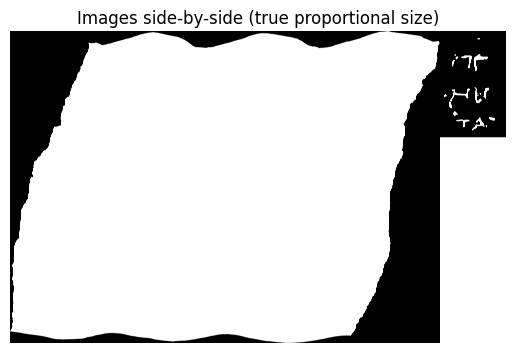

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def combine_images_proportional(img_path1, img_path2, show=True, save_path=None):
    # Load both images
    img1 = cv2.imread(img_path1)
    img2 = cv2.imread(img_path2)

    if img1 is None or img2 is None:
        raise ValueError("One or both image paths are invalid.")

    # Get sizes
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    # Compute relative scale (based on height)
    scale = h2 / h1  # how much smaller img2 is than img1

    # Resize img2 to maintain *true ratio*
    new_w2 = int(w2)
    new_h2 = int(h2)
    new_w1 = int(w1)
    new_h1 = int(h1)
    print(h1,h2)

    # To visualize proportional size differences, make a blank canvas
    canvas_height = max(new_h1, new_h2)
    canvas_width = new_w1 + new_w2
    canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255

    # Place both images on canvas (left = img1, right = img2)
    canvas[:new_h1, :new_w1] = cv2.resize(img1, (new_w1, new_h1))
    canvas[:new_h2, new_w1:new_w1+new_w2] = cv2.resize(img2, (new_w2, new_h2))

    # Convert BGR→RGB for display
    canvas_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

    # Show result
    if show:
        plt.imshow(canvas_rgb)
        plt.axis("off")
        plt.title("Images side-by-side (true proportional size)")
        plt.show()

    # Save if requested
    if save_path:
        cv2.imwrite(save_path, canvas)

    return canvas_rgb

# Example usage:
combine_images_proportional("../train_scrolls/20231210132040/20231210132040_mask.png", "../train_scrolls/Frag5/Frag5_inklabels.png")

# CROP

In [1]:
from transformers import AutoVideoProcessor, AutoModel

hf_repo = "facebook/vjepa2-vitl-fpc64-256"

model = AutoModel.from_pretrained(hf_repo)
processor = AutoVideoProcessor.from_pretrained(hf_repo)

/home/ubuntu/miniconda3/envs/dion/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ubuntu/miniconda3/envs/dion/lib/python3.10/site-packages/transformers/utils/hub.py:110: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [6]:
processor

VJEPA2VideoProcessor {
  "crop_size": {
    "height": 256,
    "width": 256
  },
  "data_format": "channels_first",
  "default_to_square": true,
  "device": null,
  "do_center_crop": true,
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_pad": null,
  "do_rescale": true,
  "do_resize": true,
  "do_sample_frames": null,
  "fps": null,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "input_data_format": null,
  "num_frames": null,
  "pad_size": null,
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "return_metadata": false,
  "size": {
    "shortest_edge": 292
  },
  "size_divisor": null,
  "video_metadata": null,
  "video_processor_type": "VJEPA2VideoProcessor"
}

In [5]:
import torch

# Create a fake 3D image (e.g., grayscale video or MRI scan)
# Shape = (batch, channels, time, height, width)
x = torch.rand(1, 8, 3, 224, 224)

print("3D image tensor shape:", x.shape)
print("Example voxel intensity:", x[0, 0, 0, :5, :5])
model(x)

3D image tensor shape: torch.Size([1, 8, 3, 224, 224])
Example voxel intensity: tensor([[0.2947, 0.1547, 0.8956, 0.8677, 0.4480],
        [0.6033, 0.9416, 0.5172, 0.6428, 0.7090],
        [0.9168, 0.3762, 0.5580, 0.0465, 0.7418],
        [0.6973, 0.9716, 0.6016, 0.7973, 0.6854],
        [0.2230, 0.1475, 0.2634, 0.5638, 0.4979]])


VJEPA2WithMaskedInputModelOutput(last_hidden_state=tensor([[[-0.3282,  0.2653,  0.7503,  ...,  0.5359,  0.3267,  0.4076],
         [ 0.6560,  0.0363, -0.2138,  ...,  4.3886,  1.4744, -0.5140],
         [ 1.1108,  1.6311,  0.7751,  ..., -1.6494, -0.5333,  1.1622],
         ...,
         [-0.6928,  1.4027, -0.4749,  ..., -0.3202,  1.0373,  1.0864],
         [ 0.4390, -1.4875,  0.6250,  ...,  3.2562,  0.1102,  0.4704],
         [-0.3749,  0.0141,  1.2485,  ...,  3.2478, -0.2597,  0.3697]]],
       grad_fn=<NativeLayerNormBackward0>), masked_hidden_state=tensor([[[-0.3282,  0.2653,  0.7503,  ...,  0.5359,  0.3267,  0.4076],
         [ 0.6560,  0.0363, -0.2138,  ...,  4.3886,  1.4744, -0.5140],
         [ 1.1108,  1.6311,  0.7751,  ..., -1.6494, -0.5333,  1.1622],
         ...,
         [-0.6928,  1.4027, -0.4749,  ..., -0.3202,  1.0373,  1.0864],
         [ 0.4390, -1.4875,  0.6250,  ...,  3.2562,  0.1102,  0.4704],
         [-0.3749,  0.0141,  1.2485,  ...,  3.2478, -0.2597,  0.3697]]],
 

(3030, 2197)


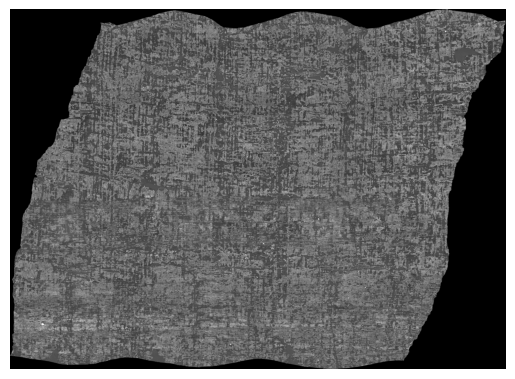

In [48]:
from PIL import Image
import PIL.Image

PIL.Image.MAX_IMAGE_PIXELS = 933120000

import matplotlib.pyplot as plt

# Path to your image
img_path = "../train_scrolls/s4/layers/32.tif"

# Open image
img = Image.open(img_path)

# Resize to 1/4 size
new_size = (img.width // 4, img.height // 4)
img_resized = img.resize(new_size, Image.Resampling.LANCZOS)
print(new_size)
# Plot in notebook
plt.imshow(img_resized, cmap='gray')
plt.axis("off")
plt.show()



(3030, 2197)


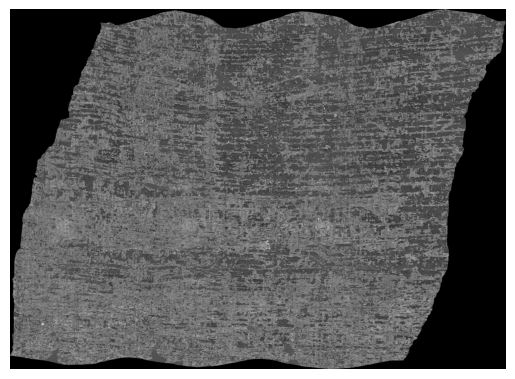

In [49]:

from PIL import Image
import PIL.Image

PIL.Image.MAX_IMAGE_PIXELS = 933120000

import matplotlib.pyplot as plt

# Path to your image
img_path = "../train_scrolls/20231210132040/layers/25.tif"

# Open image
img = Image.open(img_path)

# Resize to 1/4 size
new_size = (img.width // 4, img.height // 4)
img_resized = img.resize(new_size, Image.Resampling.LANCZOS)
print(new_size)
# Plot in notebook
plt.imshow(img_resized, cmap='gray')
plt.axis("off")
plt.show()


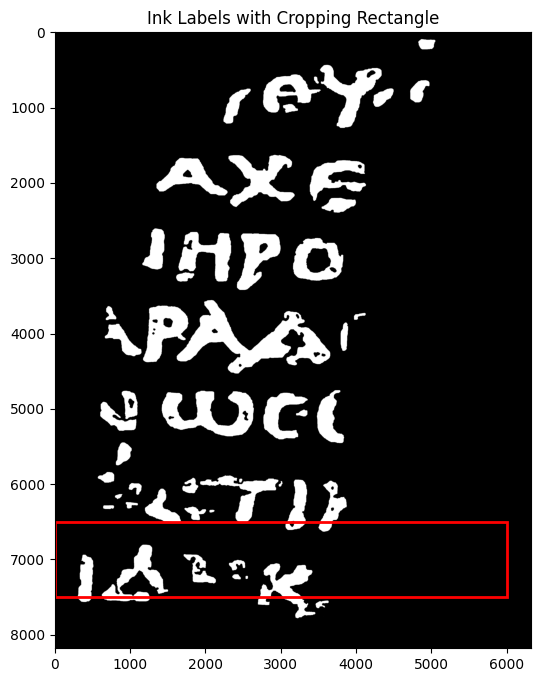

In [20]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# ==== CONFIGURABLE PART ====
FRAG_PATH = '../train_scrolls/frag1'  # Path to frag1
RECT = (0, 6500, 6000, 1000)        # (x, y, width, height)
# ============================
inklabel_path = os.path.join(FRAG_PATH, 'frag1_inklabels.png')
img = Image.open(inklabel_path)

# Plot the image with rectangle
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img, cmap='gray')
x, y, w, h = RECT
rect_patch = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect_patch)
ax.set_title("Ink Labels with Cropping Rectangle")
plt.show()

In [21]:
import os
from PIL import Image
from tqdm import tqdm

# ==== CONFIGURABLE PART ====
FRAG_PATH = '../train_scrolls/frag1'  # Path to frag1
RECT = (0, 6600, 6000, 1300)        # (x, y, width, height)
FRAG_NAME = os.path.basename(FRAG_PATH.rstrip('/'))
# ============================

LAYER_DIR = os.path.join(FRAG_PATH, 'layers')
RECT_OUT = os.path.join("../train_scrolls", 'f16')
# REMAINING_OUT = os.path.join("../train_scrolls", 'remaining2')

RECT_LAYER_OUT = os.path.join(RECT_OUT, 'layers')
# REMAINING_LAYER_OUT = os.path.join(REMAINING_OUT, 'layers')

os.makedirs(RECT_LAYER_OUT, exist_ok=True)

# --- Get reference size from first TIFF ---
ref_size = None
for fname in os.listdir(LAYER_DIR):
    if fname.lower().endswith(('.tif', '.tiff')):
        with Image.open(os.path.join(LAYER_DIR, fname)) as ref_img:
            ref_size = ref_img.size
        break
if ref_size is None:
    raise RuntimeError("No TIFF file found for reference size.")

def split_image(img_path, rect, out_name, out_subdir=None, resize_to=None):
    x, y, w, h = rect
    img = Image.open(img_path)
    if img.mode == "RGBA":
        # Option 1: Drop alpha and convert to grayscale
        img = img.convert("L")

    elif img.mode == "RGB":
        # Convert to grayscale if needed
        img = img.convert("L")

    # Ensure mask/inklabels match size
    if resize_to is not None and img.size != resize_to:
        img = img.resize(resize_to, Image.NEAREST)  # NEAREST avoids blurring labels

    # Crop rectangle
    rect_crop = img.crop((x, y, x + w, y + h))
    rect_crop.save(os.path.join(out_subdir[0], out_name))


# Process all TIFF layers
for fname in tqdm(os.listdir(LAYER_DIR)):
    if fname.lower().endswith(('.tiff', '.tif', '.png')):
        fpath = os.path.join(LAYER_DIR, fname)
        split_image(fpath, RECT, fname, (RECT_LAYER_OUT, None))

# Process mask + inklabels
for suffix in ['mask.png','inklabels.png']:
    fname = f"{FRAG_NAME}_{suffix}"
    fpath = os.path.join(FRAG_PATH, fname)
    if os.path.exists(fpath):
        rect_outname = f"{os.path.basename(RECT_OUT)}_{suffix}"
        split_image(fpath, RECT, rect_outname, (RECT_OUT, None), resize_to=ref_size)

print(f"Cropping + resizing complete for {FRAG_NAME}.")


100%|██████████| 73/73 [00:03<00:00, 23.57it/s]


Cropping + resizing complete for frag1.


In [6]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

# ==== CONFIGURABLE PART ====
FRAG_PATH = '../train_scrolls/Frag5'  # Path to frag1
RECT = (900, 2300, 1000, 1000)        # (x, y, width, height)
FRAG_NAME = os.path.basename(FRAG_PATH.rstrip('/'))
# ============================

LAYER_DIR = os.path.join(FRAG_PATH, 'layers')
RECT_OUT = os.path.join("../train_scrolls", 'F1')
REMAINING_OUT = os.path.join("../train_scrolls", 'F2')

RECT_LAYER_OUT = os.path.join(RECT_OUT, 'layers')
REMAINING_LAYER_OUT = os.path.join(REMAINING_OUT, 'layers')

os.makedirs(RECT_LAYER_OUT, exist_ok=True)
os.makedirs(REMAINING_LAYER_OUT, exist_ok=True)

# --- Get reference size from first TIFF ---
ref_size = None
for fname in os.listdir(LAYER_DIR):
    if fname.lower().endswith(('.tif', '.tiff')):
        with Image.open(os.path.join(LAYER_DIR, fname)) as ref_img:
            ref_size = ref_img.size
        break
# if ref_size is None:
#     raise RuntimeError("No TIFF file found for reference size.")

def split_image(img_path, rect, out_name, out_subdir=None, resize_to=None):
    x, y, w, h = rect
    img = Image.open(img_path)
    if img.mode == "RGBA":
        # Option 1: Drop alpha and convert to grayscale
        img = img.convert("L")

    elif img.mode == "RGB":
        # Convert to grayscale if needed
        img = img.convert("L")

    # Ensure mask/inklabels match size
    if resize_to is not None and img.size != resize_to:
        img = img.resize(resize_to, Image.NEAREST)  # NEAREST avoids blurring labels

    # Crop rectangle
    rect_crop = img.crop((x, y, x + w, y + h))
    rect_crop.save(os.path.join(out_subdir[0], out_name))

    # --- Optionally keep remaining image ---
    img_arr = np.array(img)
    img_arr[y:y+h, x:x+w] = 0
    Image.fromarray(img_arr).save(os.path.join(out_subdir[1], out_name))

# Process all TIFF layers
for fname in tqdm(os.listdir(LAYER_DIR)):
    if fname.lower().endswith(('.tiff', '.tif', '.png')):
        fpath = os.path.join(LAYER_DIR, fname)
        split_image(fpath, RECT, fname, (RECT_LAYER_OUT, REMAINING_LAYER_OUT))

# Process mask + inklabels
for suffix in ['mask.png','inklabels.png']:
    fname = f"{FRAG_NAME}_{suffix}"
    fpath = os.path.join(FRAG_PATH, fname)
    if os.path.exists(fpath):
        rect_outname = f"{os.path.basename(RECT_OUT)}_{suffix}"
        rem_outname  = f"{os.path.basename(REMAINING_OUT)}_{suffix}"
        split_image(fpath, RECT, rect_outname, (RECT_OUT, REMAINING_OUT), resize_to=ref_size)

print(f"Cropping + resizing complete for {FRAG_NAME}.")


100%|██████████| 31/31 [00:08<00:00,  3.76it/s]

Cropping + resizing complete for Frag5.


In [10]:
import os
from PIL import Image
from tqdm import tqdm
# Image.MAX_IMAGE_PIXELS = None  # Avoid DecompressionBombWarning

import numpy as np

# ==== CONFIGURABLE PART ====
FRAG_PATH = '../train_scrolls/s4'  # Path to frag1
RECT = (4400, 6500, 800, 1300)        # (x, y, width, height)
FRAG_NAME = FRAG_PATH.split("/")[-1]
# ============================
# Automatically extract fragment name (e.g., "frag5")
frag_name = os.path.basename(FRAG_PATH.rstrip('/'))

LAYER_DIR = os.path.join(FRAG_PATH, 'layers')

# LAYER_DIR = "train_scrolls/"
RECT_OUT = os.path.join("../train_scrolls", 's41')
REMAINING_OUT = os.path.join("../train_scrolls", 'remaining2')

# Subfolders for tiff output
RECT_LAYER_OUT = os.path.join(RECT_OUT, 'layers')
REMAINING_LAYER_OUT = os.path.join(REMAINING_OUT, 'layers')

# Create all necessary directories
os.makedirs(RECT_LAYER_OUT, exist_ok=True)
os.makedirs(REMAINING_LAYER_OUT, exist_ok=True)

def split_image(img_path, rect, out_name, out_subdir=None):
    x, y, w, h = rect
    img = Image.open(img_path)

    if img.mode == "RGBA":
        # Option 1: Drop alpha and convert to grayscale
        img = img.convert("L")

    elif img.mode == "RGB":
        # Convert to grayscale if needed
        img = img.convert("L")
    # img_np = np.array(img)
    # Crop rectangle
    rect_crop = img.crop((x, y, x + w, y + h))
    rect_crop.save(os.path.join(out_subdir[0], out_name))
    
    # # REMAINING
    # img = np.array(img)
    # if img_path.lower().endswith(('.png')):
    #     img = img
    # img[y:y+h, x:x+w] = 0  # Zero only this region
    # # 3. Save the masked image
    # img = Image.fromarray(img)  
    # img.save(os.path.join(out_subdir[1], out_name))

# Process all TIFF layers
for fname in tqdm(os.listdir(LAYER_DIR)):
    if fname.lower().endswith(('.tiff', '.tif',".png")):
        fpath = os.path.join(LAYER_DIR, fname)
        split_image(fpath, RECT, fname, (RECT_LAYER_OUT, REMAINING_LAYER_OUT))

# # Process inklabels and mask — keep them in top-level output folders
# for suffix in ['mask.png','inklabels.png']:
#     fname = f"{frag_name}_{suffix}"
#     fpath = os.path.join(FRAG_PATH, fname)
#     if os.path.exists(fpath):
#         split_image(fpath, RECT, fname, (RECT_OUT, REMAINING_OUT))
# Process inklabels and mask — rename them based on output folder name
for suffix in ['mask.png','inklabels.png']:
    fname = f"{frag_name}_{suffix}"
    fpath = os.path.join(FRAG_PATH, fname)
    if os.path.exists(fpath):
        # Use rect1_ and remaining1_ instead of frag_name
        rect_outname = f"{os.path.basename(RECT_OUT)}_{suffix}"
        rem_outname  = f"{os.path.basename(REMAINING_OUT)}_{suffix}"
        split_image(fpath, RECT, rect_outname, (RECT_OUT, REMAINING_OUT))


print(f"Cropping complete for {frag_name}.")

100%|██████████| 72/72 [00:00<00:00, 191.76it/s]


Cropping complete for s4.


Original size: (800, 1300)
Resized size: (200, 325)


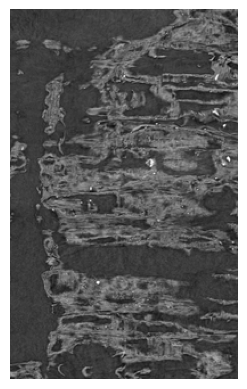

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Open image
img = Image.open('../train_scrolls/s41/layers/05.tif')
print("Original size:", img.size)

# Resize to 1/4 size
new_size = (img.size[0] // 4, img.size[1] // 4)
img_small = img.resize(new_size, Image.LANCZOS)
print("Resized size:", img_small.size)

# Show image
plt.imshow(img_small, cmap='gray')
plt.axis('off')
plt.show()

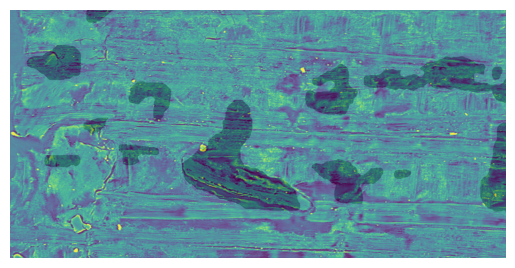

In [40]:
from PIL import Image
import matplotlib.pyplot as plt

# Load images
base_img = Image.open('train_scrolls/rect11/layers/20.tif')
mask_img = Image.open('train_scrolls/rect11/rect11_inklabels.png')

# Show overlay
plt.imshow(base_img)     # base image in grayscale
plt.imshow(mask_img.convert('L'), cmap='Reds', alpha=0.2)  # overlay mask in red
plt.axis('off')
plt.show()


# METRICS


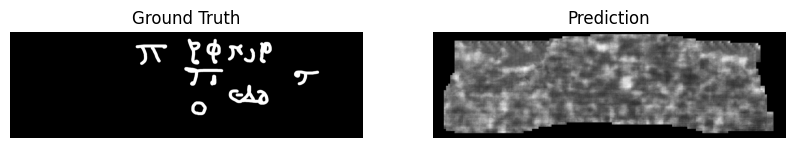

{'Error': "Target is multiclass but average='binary'. Please choose another "
          "average setting, one of [None, 'micro', 'macro', 'weighted']."}


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, precision_score, recall_score

def resize_image(image, target_shape):
    return cv2.resize(image, (target_shape[1], target_shape[0]), interpolation=cv2.INTER_NEAREST)

def compute_metrics(result_path, ground_truth_path, threshold=0.5):
    # Load images in grayscale
    result = cv2.imread(result_path, cv2.IMREAD_GRAYSCALE)
    ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize ground truth to match result
    ground_truth = resize_image(ground_truth, result.shape)
    try:
        # Normalize to binary using a variable threshold (0 to 1 range)
        threshold_value = int(threshold * 255)
        # result = (result > threshold_value).astype(np.uint8)
        ground_truth = (ground_truth > threshold_value).astype(np.uint8)
        
        # Compute pixel accuracy
        pixel_accuracy = accuracy_score(ground_truth.flatten(), result.flatten())
        
        # Compute precision and recall
        precision = precision_score(ground_truth.flatten(), result.flatten(), zero_division=1)
        recall = recall_score(ground_truth.flatten(), result.flatten(), zero_division=1)
        
        # Compute IoU
        intersection = np.logical_and(result, ground_truth).sum()
        union = np.logical_or(result, ground_truth).sum()
        iou = intersection / union if union != 0 else 0
        
        # Compute Dice coefficient (F1-score for segmentation)
        dice = (2 * intersection) / (result.sum() + ground_truth.sum()) if (result.sum() + ground_truth.sum()) != 0 else 0
        
        # Compute AUPRC
        precision_curve, recall_curve, _ = precision_recall_curve(ground_truth.flatten(), result.flatten())
        auprc = auc(recall_curve, precision_curve)
        
        metrics = {
            "Pixel Accuracy": pixel_accuracy,
            "Precision": precision,
            "Recall": recall,
            "IoU": iou,
            "Dice Coefficient": dice,
            "AUPRC": auprc
        }
    except Exception as e:
        metrics = {
            "Error": str(e)
        }
    
    # Display images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(ground_truth, cmap='gray')
    plt.title("Ground Truth")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title("Prediction")
    plt.axis("off")
    
    plt.show()
    
    return metrics

# Example usage
result_path = "../wandb/run-20250730_235123-0du3ircv/files/media/images/masks_72_53dfea2d9e0ad85f9c16.png"
ground_truth_path = "../train_scrolls/20231215151901/20231215151901_inklabels.png"
threshold = 0.6 # Adjustable threshold between 0 and 1
metrics = compute_metrics(result_path, ground_truth_path, threshold)
pprint(metrics)

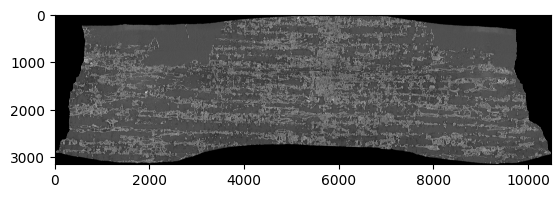

In [20]:
import cv2
# Load image
img = cv2.imread('../train_scrolls/20231215151901/layers/20.tif')

plt.imshow(img)

# RESIZE

(8790, 12122)
(8790, 12122)


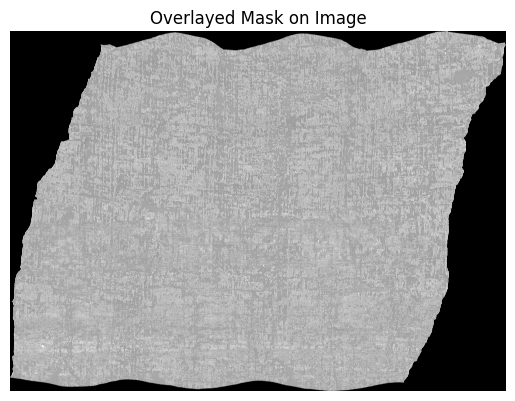

In [62]:
import cv2
import matplotlib.pyplot as plt

# Load grayscale mask
mask = cv2.imread('../train_scrolls/s4/s4_mask.png', 0)  # '0' loads as grayscale
print(mask.shape)
# mask = cv2.resize(mask, (mask.shape[1]//4, mask.shape[0]//4), interpolation=cv2.INTER_AREA)
# Compute padding needed to make dimensions divisible by 256
# pad0 = (256 - mask.shape[0] % 256) 
# pad1 = (256 - mask.shape[1] % 256)

# Apply padding — for 2D array, just two dimensions
# mask = np.pad(mask, [(0, pad0), (0, pad1)], constant_values=0)

# Load background (layer)
background = cv2.imread('../train_scrolls/s4/layers/32.tif',0)
print(background.shape)

# Resize mask to match background
mask_resized = cv2.resize(mask, (background.shape[1], background.shape[0]))

# Overlay with transparency
alpha = .5  # transparency level (0 = only background, 1 = only mask)
overlay = cv2.addWeighted(background, 1 - alpha, mask_resized, alpha, 0)

# Convert BGR to RGB for matplotlib
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

cv2.imwrite('overlayed_mask.png', overlay)  # Save the overlayed image

# Display the overlay
plt.imshow(overlay_rgb)
plt.axis('off')
plt.title('Overlayed Mask on Image')
plt.show()

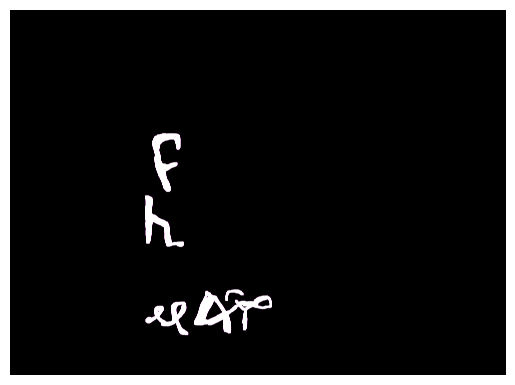

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img = cv2.imread('../wandb/run-20250731_153934-61qhh0ow/files/media/images/masks_784_4145bd45306d89c6133e.png')

img2 = cv2.imread('../train_scrolls/s4/layers/40.tif')

# Pad img2 with 256 pixels on all sides
pad_width = 256
img2_padded = cv2.copyMakeBorder(
    img2,
    pad_width, pad_width, pad_width, pad_width,  # top, bottom, left, right
    borderType=cv2.BORDER_CONSTANT,
    value=[0, 0, 0]  # black padding
)

# Resize padded img2 to match shape of img
img2_resized = cv2.resize(img, (img2_padded.shape[1], img2_padded.shape[0]))

# Convert to RGB for matplotlib
img_rgb = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB)

# Save and display
cv2.imwrite('img2_padded_resized.png', img2_resized)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img = cv2.imread('img2_padded_resized.png')
img2 = cv2.imread('resized_2.png')

# Pad img2 with 256 pixels on all sides
pad_width = 256
img2_padded = cv2.copyMakeBorder(
    img2,
    pad_width, pad_width, pad_width, pad_width,
    borderType=cv2.BORDER_CONSTANT,
    value=[0, 0, 0]
)

# Resize padded img2 to match img
img2_resized = cv2.resize(img2_padded, (img.shape[1], img.shape[0]))

# Blend the images: 70% of img + 30% of img2
overlay = cv2.addWeighted(img, 0.7, img2_resized, 0.3, 0)

# Convert BGR to RGB for display
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

# Save and display
cv2.imwrite('overlay.png', overlay)

plt.imshow(overlay_rgb)
plt.axis('off')
plt.show()


[ WARN:0@8274.198] global loadsave.cpp:268 findDecoder imread_('img2_padded_resized.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

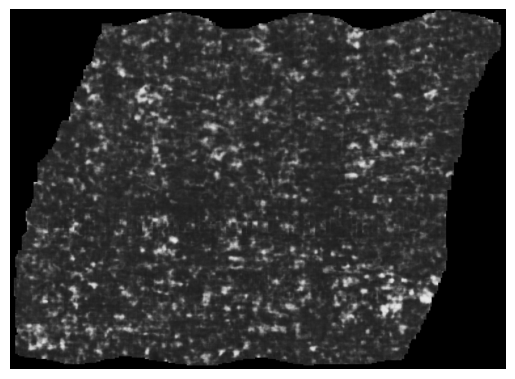

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('wandb/run-20250602_091148-quv97k49/files/media/images/masks_794_45dac4174a9a65a6ddc1.png')

# Resize image to half the original size
img_resized = cv2.resize(img, (img.shape[1] // 4, img.shape[0] // 4))
cv2.imwrite('resized.png', img_resized)

# Convert BGR (OpenCV default) to RGB for proper display with matplotlib
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


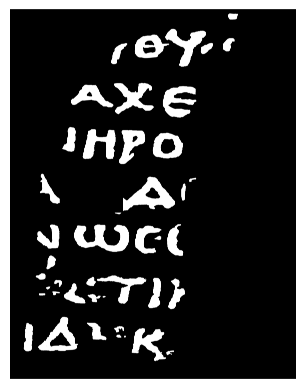

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load source and target images
source_img = cv2.imread('0000002.png')
target_img = cv2.imread('train_scrolls/remaining11/remaining11_inklabels.png')

# Get dimensions of the target image
target_height, target_width = target_img.shape[:2]

# Resize source image to match target image size
resized_img = cv2.resize(source_img, (target_width, target_height))

# Optional: Save the resized image
cv2.imwrite('resized_output_path.png', resized_img)

# Convert BGR to RGB for matplotlib display
resized_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Display resized image
plt.imshow(resized_rgb)
plt.axis('off')
plt.show()


# PSEUDO

In [2]:
import cv2
import numpy as np

# Load the image in grayscale
image = cv2.imread('wandb/run-20250721_200047-eox9zgsu/files/media/images/masks_1656_754a2307e92c2b0229ab.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('pseudo.png', image)

# Threshold to binarize
threshold_value = 90
_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Remove small objects using connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Set a minimum area threshold (e.g., 500 pixels)
min_area = 40000

# Create a blank image to store filtered objects
filtered_image = np.zeros_like(binary_image)

# Keep only large components
for i in range(1, num_labels):  # Skip background (label 0)
    area = stats[i, cv2.CC_STAT_AREA]
    if area >= min_area:
        filtered_image[labels == i] = 255
        
# Morphological erosion
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))  # Shape and size of erosion
eroded_image = cv2.erode(filtered_image, kernel, iterations=1)
# Optional: Save the resized image
# cv2.imwrite('errrrrr.png', eroded_image)
# Load second image (original grayscale again if needed)
original = image.copy()  # already loaded above, original grayscale

# Create soft label mask
soft_mask = np.zeros_like(original, dtype=np.uint8)

soft_mask[eroded_image == 255] = 255
# # Assign strong foreground (from eroded binary)
# soft_mask[eroded_image == 255] = 255.0

# # Assign strong background (only where not already labeled as 255)
# soft_mask[(original < 0) & (eroded_image != 255)] = 0.0

# # Assign 0.5 to the rest (uncertain area)
# soft_mask[(soft_mask != 255.0) & (soft_mask != 0.0)] = 10
# Assign strong foreground

# Assign uncertain (middle) to pixels that were above threshold in original but not part of final eroded blobs
uncertain_mask = (original >= 30) & (eroded_image != 255)
soft_mask[uncertain_mask] = 127
cv2.imwrite("final_soft_mask_visual.png", soft_mask)


# # Everything else is strong background
# soft_mask[(soft_mask != 255.0) & (soft_mask != 0.5)] = 0.0
# # Optional: Save visual version
# visual_mask = np.zeros_like(original, dtype=np.uint8)
# visual_mask[soft_mask == 255.0] = 255
# visual_mask[soft_mask == 10] = 127
# visual_mask[soft_mask == 0.0] = 0
# cv2.imwrite("final_soft_mask_visual.png", visual_mask)


True

# MATCH HISTOGRAMS

In [ ]:
import numpy as np
import tifffile
from skimage.exposure import match_histograms
import os

# Load 3D volume from TIFF stack
def load_tiff_stack(folder_path):
    # Assuming folder_path contains slices named in order or just one multi-page TIFF
    # If multi-page TIFF:
    volume = tifffile.imread(folder_path)
    return volume

# Save 3D volume as TIFF stack (multi-page TIFF)
def save_tiff_stack(volume, out_path):
    tifffile.imwrite(out_path, volume.astype(np.uint16))  # change dtype as needed

# Match histogram for the whole 3D volume
def match_3d_histogram(source, reference):
    matched = match_histograms(source, reference, channel_axis=None)
    return matched

# Paths to your TIFF stacks (multi-page TIFF files or folders with slices)
ref_tiff_path = './train_scrolls/frag5/layers/30.tif'
src_tiff_path = './train_scrolls/frag1/layers/30.tif'
out_tiff_path = 'matched_54kv_to_73kv.tif'

# Load volumes
ref_volume = load_tiff_stack(ref_tiff_path)
src_volume = load_tiff_stack(src_tiff_path)

# Check shapes are the same or resize if necessary
print(f'Reference volume shape: {ref_volume.shape}')
print(f'Source volume shape: {src_volume.shape}')

# If shapes differ, you might want to resize source to ref or vice versa before matching

# Match histograms
matched_volume = match_3d_histogram(src_volume, ref_volume)

# Save matched volume
save_tiff_stack(matched_volume, out_tiff_path)

print(f'Matched volume saved to {out_tiff_path}')


Reference volume shape: (7309, 4560)
Source volume shape: (8181, 6330)
Matched volume saved to matched_54kv_to_73kv.tif


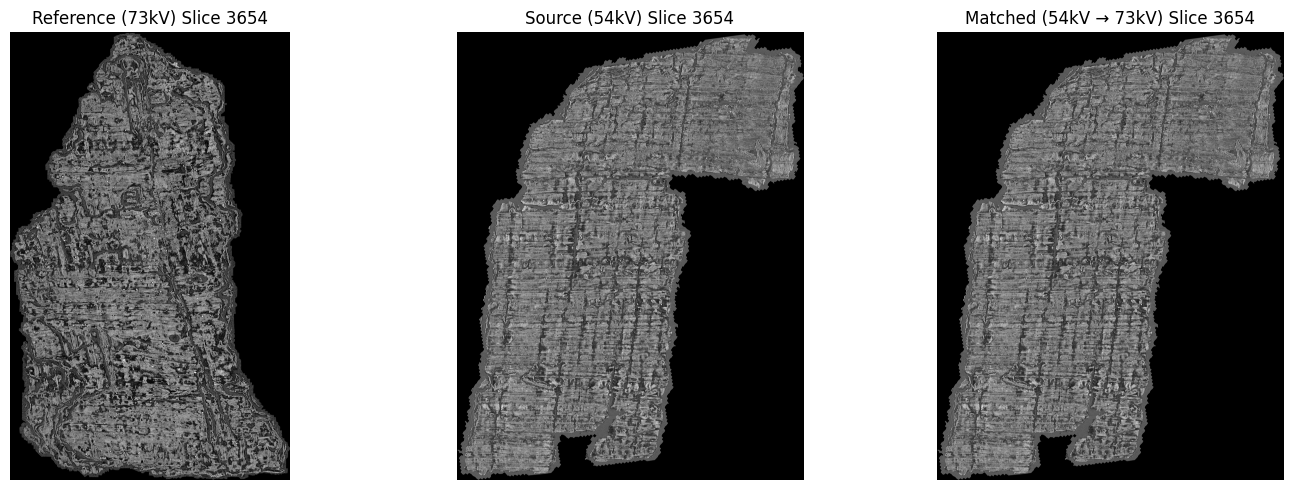

In [ ]:
import matplotlib.pyplot as plt

def plot_slices_side_by_side(ref_vol, src_vol, matched_vol, slice_idx=None):
    # If no slice index specified, use the middle slice
    if slice_idx is None:
        slice_idx = ref_vol.shape[0] // 2
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot reference slice
    axes[0].imshow(ref_vol, cmap='gray')
    axes[0].set_title(f'Reference (73kV) Slice {slice_idx}')
    axes[0].axis('off')
    
    # Plot source slice
    axes[1].imshow(src_vol, cmap='gray')
    axes[1].set_title(f'Source (54kV) Slice {slice_idx}')
    axes[1].axis('off')
    
    # Plot matched slice
    axes[2].imshow(matched_vol, cmap='gray')
    axes[2].set_title(f'Matched (54kV → 73kV) Slice {slice_idx}')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_slices_side_by_side(ref_volume, src_volume, matched_volume)


In [ ]:
import numpy as np
import tifffile
from skimage.exposure import match_histograms
import os

# Load all TIFF slices from a folder into a 3D numpy array
def load_tiff_folder(folder_path):
    # List all TIFF files, sorted by filename (assumes correct slice order)
    files = sorted([f for f in os.listdir(folder_path) if f.endswith('.tif') or f.endswith('.tiff')])
    volume_slices = []
    for f in files:
        slice_img = tifffile.imread(os.path.join(folder_path, f))
        volume_slices.append(slice_img)
    volume = np.stack(volume_slices, axis=0)
    return volume, files  # returning filenames to reuse for saving

# Save 3D numpy array as individual TIFF slices in output folder
def save_tiff_folder(volume, filenames, out_folder):
    os.makedirs(out_folder, exist_ok=True)
    for i, filename in enumerate(filenames):
        out_path = os.path.join(out_folder, filename)
        tifffile.imwrite(out_path, volume[i].astype(np.uint16))  # adjust dtype if needed

# Histogram match slice-by-slice
def match_histograms_slicewise(src_vol, ref_vol):
    matched_slices = []
    for i in range(src_vol.shape[0]):
        matched = match_histograms(src_vol[i], ref_vol[i], channel_axis=None)
        matched_slices.append(matched)
    matched_volume = np.stack(matched_slices, axis=0)
    return matched_volume

# Paths to folders containing TIFF slices
ref_folder = './train_scrolls/frag1/layers/'
src_folder = './train_scrolls/frag5/layers/'
out_folder = './matched_54kv_to_73kv_slices'

# Load volumes and get filenames
ref_volume, ref_files = load_tiff_folder(ref_folder)
src_volume, src_files = load_tiff_folder(src_folder)

# Sanity check: number of slices and file names should match
# assert ref_volume.shape == src_volume.shape, "Source and Reference volumes must have the same shape!"
assert ref_files == src_files, "Filenames in source and reference folders should match and be in the same order!"

print(f'Volume shape: {ref_volume.shape}')
print(f'Number of slices: {len(ref_files)}')

# Match histograms slice-by-slice
matched_volume = match_histograms_slicewise(src_volume, ref_volume)

# Save matched slices
save_tiff_folder(matched_volume, src_files, out_folder)

print(f'Matched slices saved to folder: {out_folder}')


Volume shape: (65, 8181, 6330)
Number of slices: 65
Matched slices saved to folder: ./matched_54kv_to_73kv_slices


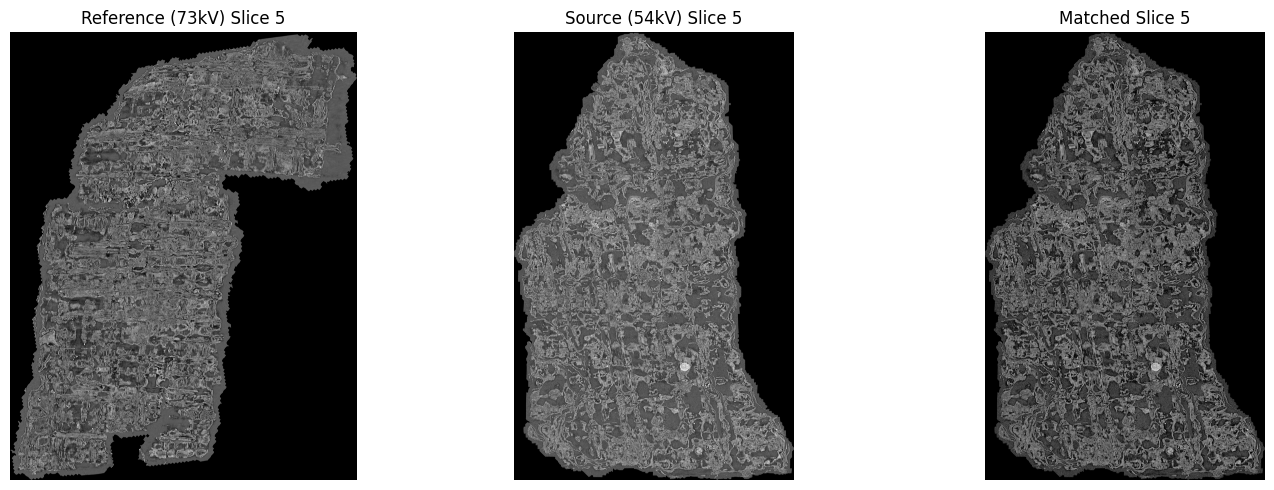

In [ ]:
import matplotlib.pyplot as plt
import tifffile

# Load volumes (assuming multi-page TIFF or stacks already loaded)
ref_folder = './train_scrolls/frag1/layers'
src_folder = './train_scrolls/frag5/layers'
matched_folder = './matched_54kv_to_73kv_slices'

def load_tiff_slice(folder_path, slice_idx=0):
    # Load the slice-th TIFF file (assuming sorted filenames)
    files = sorted([f for f in os.listdir(folder_path) if f.endswith('.tif') or f.endswith('.tiff')])
    slice_img = tifffile.imread(os.path.join(folder_path, files[slice_idx]))
    return slice_img

slice_idx = 5  # change this index to view other slices

# Load slices
ref_slice = load_tiff_slice(ref_folder, slice_idx)
src_slice = load_tiff_slice(src_folder, slice_idx)
matched_slice = load_tiff_slice(matched_folder, slice_idx)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ref_slice, cmap='gray')
axes[0].set_title(f'Reference (73kV) Slice {slice_idx}')
axes[0].axis('off')

axes[1].imshow(src_slice, cmap='gray')
axes[1].set_title(f'Source (54kV) Slice {slice_idx}')
axes[1].axis('off')

axes[2].imshow(matched_slice, cmap='gray')
axes[2].set_title(f'Matched Slice {slice_idx}')
axes[2].axis('off')

plt.tight_layout()
plt.show()

(6957, 7348, 3)


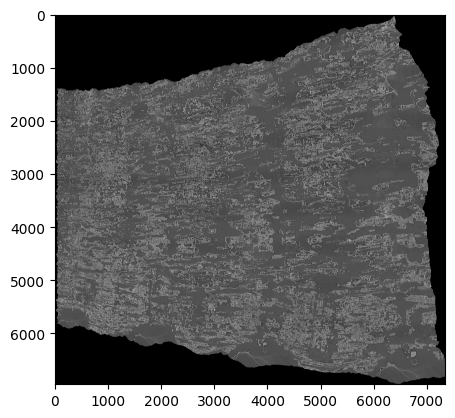

In [10]:
import cv2
# Load image
img = cv2.imread('train_scrolls/1flatboi/layers/50.jpg')
print(img.shape)
plt.imshow(img)

(8181, 6330, 3)


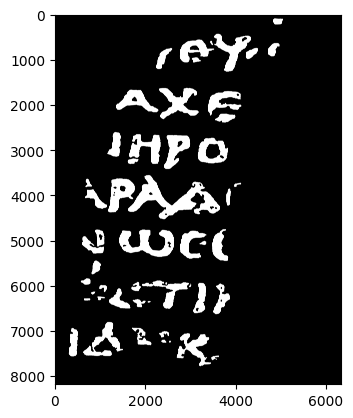

In [ ]:
import cv2
# Load image
img = cv2.imread('train_scrolls/frag1/frag1_inklabels.png')
print(img.shape)
plt.imshow(img)

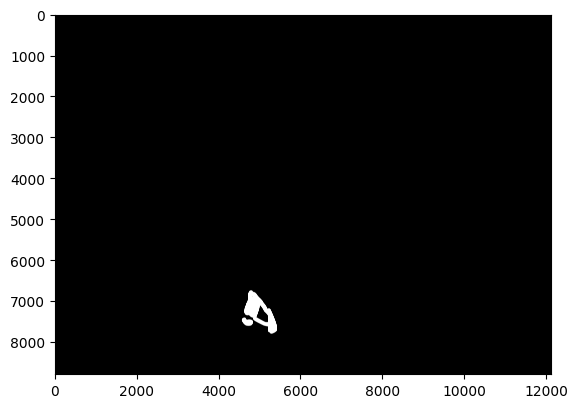

In [ ]:
import cv2
# Load image
img = cv2.imread('train_scrolls/20231210132040/20231210132040_inklabels.png')

plt.imshow(img)

In [ ]:
(2*25/2)*3

75.0

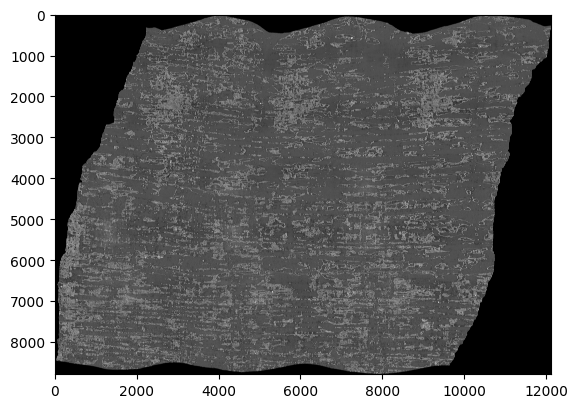

In [ ]:
import cv2
# Load image
img = cv2.imread('train_scrolls/20231210132040/layers/15.tif')

plt.imshow(img)

# AVERAGE

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

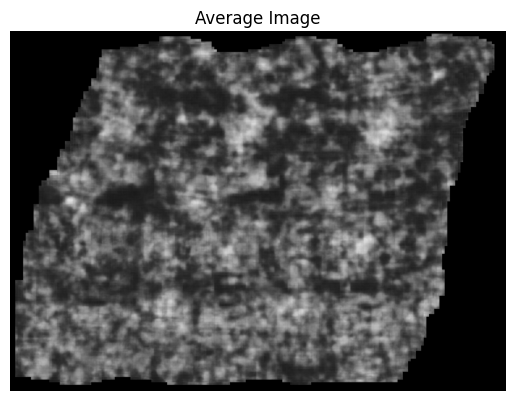

In [ ]:
image_dir = "wandb/run-20250526_164841-924i2wc3/files/media/images"
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]

images = []
for path in image_paths:
    img = Image.open(path).convert("RGB")  # or "L" for grayscale
    images.append(np.array(img, dtype=np.float32))
    

sizes = [img.shape for img in images]
if len(set(sizes)) > 1:
    raise ValueError("Images are not the same size!")

avg_image = np.mean(images, axis=0).astype(np.uint8)


plt.imshow(avg_image)
plt.axis("off")
plt.title("Average Image")
plt.show()

(2500, 8000, 3)


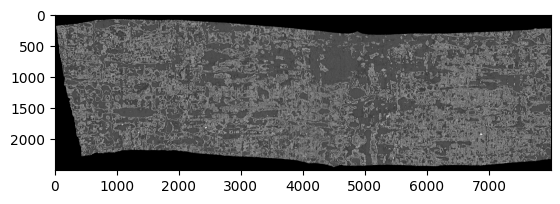

In [10]:
import cv2
import matplotlib.pyplot as plt
# Load image
img = cv2.imread('train_scrolls/s30/layers/60.tif')
print(img.shape)
plt.imshow(img)